https://www.kaggle.com/mirichoi0218/insurance/version/1

## Content
age: age of primary beneficiary;

sex: insurance contractor gender, female, male;

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9;

children: Number of children covered by health insurance / Number of dependents;

smoker: Smoking;

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest;

charges: Individual medical costs billed by health insurance.

Based on the independent variables, the automated system estimates the annual premium for the prospective customers.

In [1]:
!pip install plotly matplotlib seaborn --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading the row data

In [4]:
# load the preprocessed CSV data
insur_data = pd.read_csv('insurance.csv')

In [5]:
insur_data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

### Determining the variables of interest

In [6]:
# Check the raw_data descriptives 
insur_data.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

Comparison of min, 50% and max of numrical data show the almost normal distribution of values except "charges" with mean of 13270 and $9382 of 50%  shows positively skewed distribution. 

In [7]:
insur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values in 1338 rows. Smokers, sex and region columns are categories (string) and the other columns are numerical. 

In [8]:
insur_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploring the PDFs

Display the Probability Distribution Function (PDF) shows how that variable is distributed and displays spot anomalies, such as outliers.

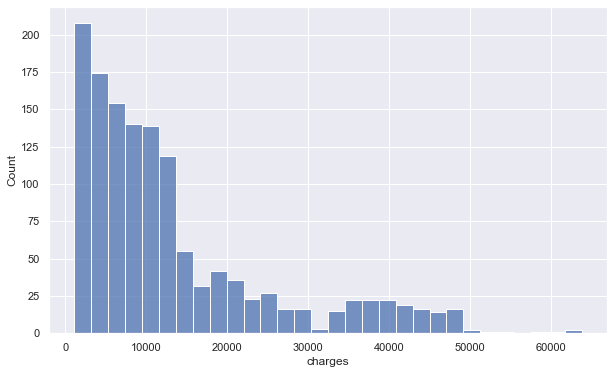

In [9]:
sns.histplot(insur_data['charges']);

Most of the costumers (~75%) are paying less than $15'000. The outliers those who pay high premiums directly related to oldages, smokers and high Body Mass Index. Outliers are a great issue for OLS, thus we must deal with them in some way. It may be a useful exercise to try training a model without removing the outliers.


In [10]:
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
#q = insur_data['charges'].quantile(0.90)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
#insur_data = insur_data[insur_data['charges']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
#insur_data.describe(include='all')

In [11]:
#sns.histplot(insur_data['charges']);

In [12]:
fig = px.histogram(insur_data, 
                   x='charges', 
                   marginal='box', #depict a boxplot above the histogram 
                   color='smoker', 
                   color_discrete_sequence=['blue', 'green'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

The people who smoke are paying more

In [13]:
insur_data.age.value_counts() 

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

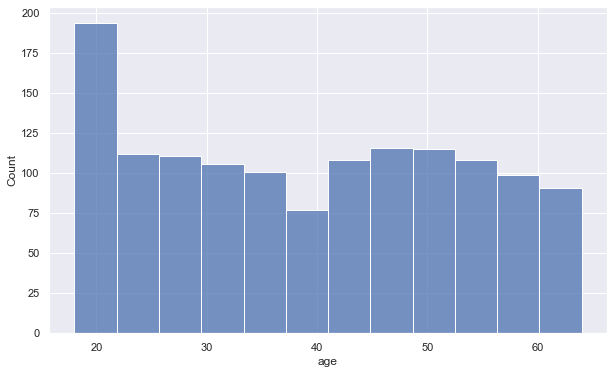

In [14]:
sns.histplot(insur_data['age']);

In [15]:
fig = px.histogram(insur_data, 
                   x='age', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['blue', 'green'], 
                   title='The age of smokers and non-smokers')
fig.update_layout(bargap=0.1)
fig.show()

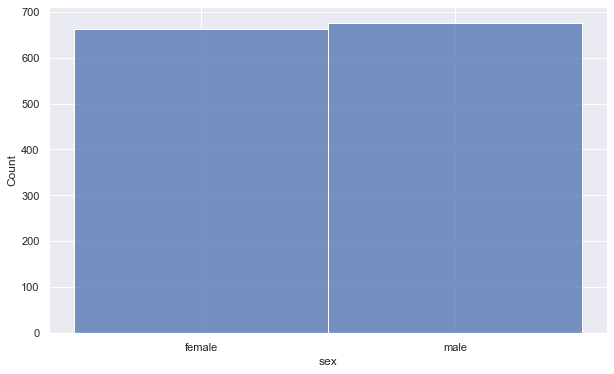

In [16]:
sns.histplot(insur_data['sex']);

In [17]:
fig = px.histogram(insur_data, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['blue', 'green'], 
                   title='Annual Medical Charges by sex')
fig.update_layout(bargap=0.1)
fig.show()

The median charges of men and women are almost the same.

In [18]:
fig = px.histogram(insur_data, 
                   x='bmi', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['blue', 'green'], 
                   title='Annual Medical Charges by sex')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig = px.scatter(insur_data, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

The above scatter plot illustrates by increasing the age, the premiums will increase. Data msake a parallel trend of 3 lines. One belongs to non-smokers, depicts in the lower part of chart with red dots, who pay the least premium. The highest premium payers are smokers with blue dots on the upper part of the chart and the mix blue and red points in the middle are smokers and non-smkers customers. 

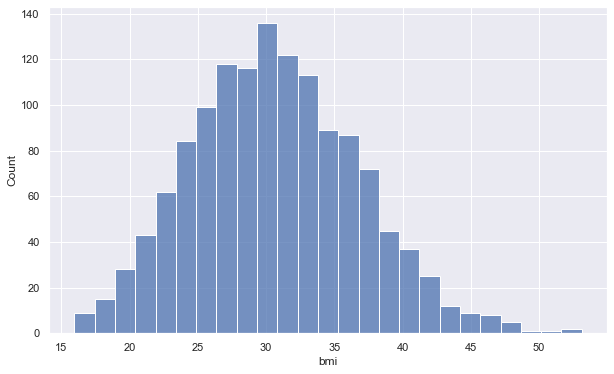

In [20]:
sns.histplot(insur_data['bmi']);

Normal distribution of BMI

In [21]:
fig = px.scatter(insur_data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In this scatter plot, non-smokers are still paying the lowest primium but there is no relationship between non-smoker's BMI and the premium charges and red dots are scattered around the plot but smokers (blue dots) make a trend on two major clusters. Smokers with BMI>28 are paying more.

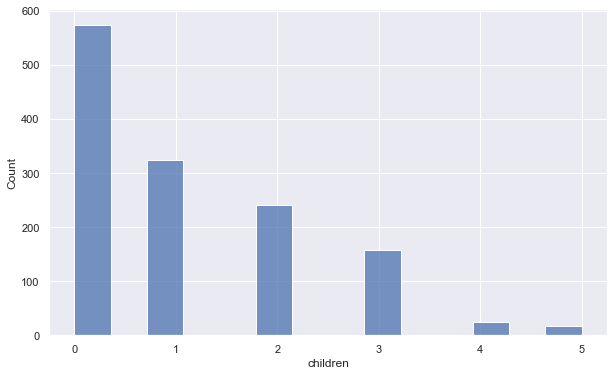

In [22]:
sns.histplot(insur_data['children']);

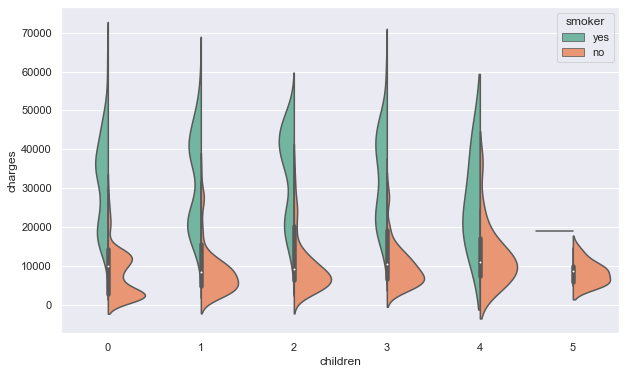

In [23]:
sns.violinplot(x="children", y="charges", hue="smoker",split=True,palette="Set2", data=insur_data);

Interesting violin plot shows the relationship of premiums and number of children based on smoking and non-smoking customers: People with 5 children don't tend to smoke and pay less. The median (the white dot in the bar) for all groups is ~$10,000 and the thick black bar in the center represents the interquartile range. It seems those people who smoke and have 0 to 4 children pay a lot. On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

In [24]:
fig = px.scatter(insur_data, 
                 x='age', 
                 y='charges', 
                 color='children', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges by number of children')
fig.update_traces(marker_size=5)
fig.show()

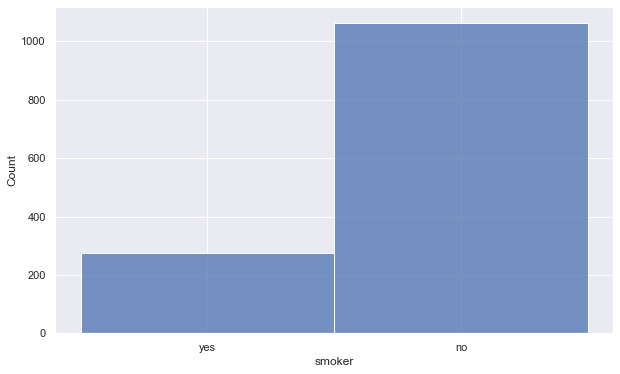

In [25]:
sns.histplot(insur_data['smoker']);

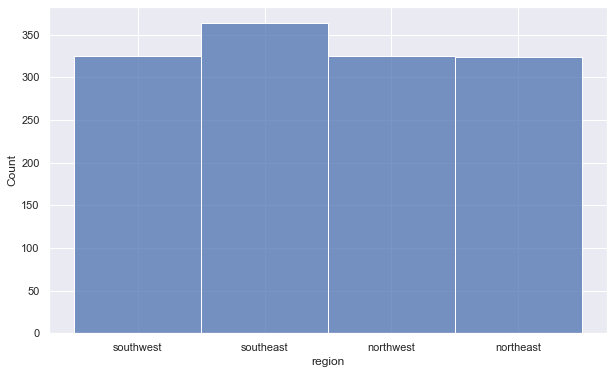

In [26]:
sns.histplot(insur_data['region']);

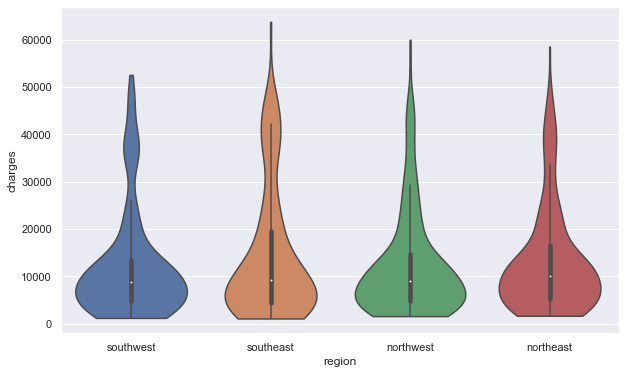

In [27]:
sns.violinplot(x="region", y="charges", cut=0, data=insur_data);

The relationship of neighborhoods and premiums shows in the above violin plot. I chop the end of the violin to zero by "cut=0". Set to 0 limit the violin range within the range of the observed data

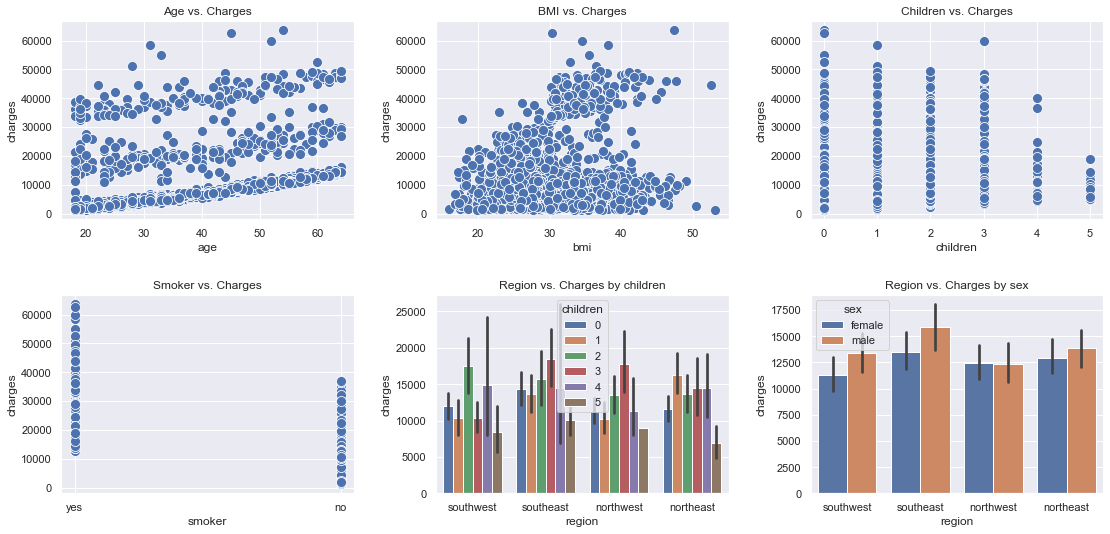

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Pass the axes into seaborn
axes[0,0].set_title('Age vs. Charges')
sns.scatterplot(x=insur_data.age, 
                y=insur_data.charges, 
                #hue=insur_data.smoker, 
                s=100, 
                ax=axes[0,0]);

axes[0,1].set_title('BMI vs. Charges')
sns.scatterplot(x=insur_data.bmi, 
                y=insur_data.charges, 
               # hue=insur_data.sex, 
                s=100, 
                ax=axes[0,1]);

axes[0,2].set_title('Children vs. Charges')
sns.scatterplot(x=insur_data.children, 
                y=insur_data.charges,
               # hue=insur_data.smoker, 
                s=100, 
                ax=axes[0,2]);
axes[1,0].set_title('Smoker vs. Charges')
sns.scatterplot(x=insur_data.smoker, 
                y=insur_data.charges, 
               # hue=insur_data.sex, 
                s=100, 
                ax=axes[1,0]);

axes[1,1].set_title('Region vs. Charges by children')
sns.barplot(x='region', y='charges', hue='children', data=insur_data, ax=axes[1,1]);

axes[1,2].set_title('Region vs. Charges by sex')
sns.barplot(x='region', y='charges', hue='sex', data=insur_data, ax=axes[1,2]);

plt.tight_layout(pad=2);

It seems "age" and "charges" are match to each other perfectly and by increasing the age, customers pay more premium. So, the relationship of data lie on lines. These numerical relationship can be used for measuring correlation coefficient.

### Correlation

Based on Investopidia, The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement.

Pandas calculates correlation coefficient by .corr() method:

In [29]:
insur_data.charges.corr(insur_data.age)

0.2990081933306476

In [30]:
insur_data.charges.corr(insur_data.bmi)

0.1983409688336288

In [31]:
insur_data.charges.corr(insur_data.children)

0.0679982268479047

There is higher correlation between age and charges

For correlating the categorical data (sex as "yes" and "no") we need to convert them to numerical data.

In [32]:
# Create a new series called "smoker_val" that change no and yes to 0 and 1. By calling pandas map() to take a function and apply it to every value of smoker column.
smoker_val = {'no' : 0, 'yes' : 1}
smoker_num = insur_data.smoker.map(smoker_val)
smoker_num

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [33]:
# now I can use "smoker_num" for correlating
insur_data.charges.corr(smoker_num)

0.7872514304984785

The smoke (smokers and non-smokers) have the highest correlation coefficient and the strongest relationship with "charges"

In [34]:
# correlation matrix
insur_data.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

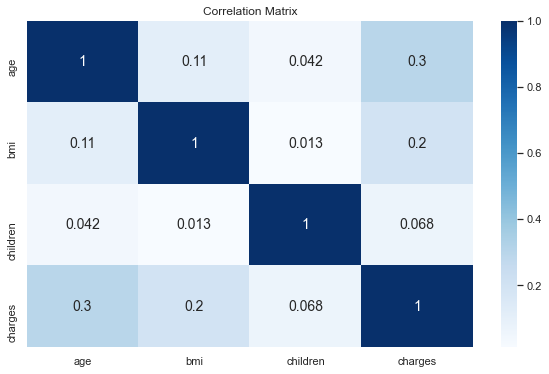

In [35]:
sns.heatmap(insur_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

## Linear Regression

I try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [36]:
# Here we are dealing with non-smokers. So, isolate the non-smokers and keep them in non_smoker_df dataframe 
non_smoker_df = insur_data[insur_data.smoker == 'no']

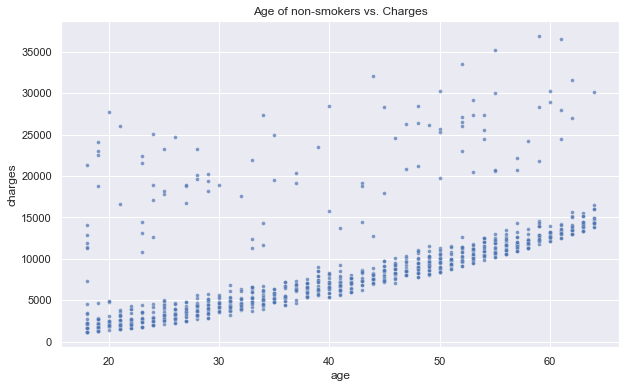

In [37]:
plt.title('Age of non-smokers vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In this case there is a linear relationship between age(=x) and charges(=y) and we can fit a line using the points to predict the charges by changing the ages. "charges = line slope * age + intercept

y = w*x + b

In [38]:
#formula for estimating the charges
def estimate_charges(age, w, b):
    return w * age + b

In [39]:
w = 50
b = 100

In [40]:
#create a column "ages" based on the non-smoker customers
ages = non_smoker_df.age
#"estimated_charges" contains 50 + different ages * 100 
estimated_charges = estimate_charges(ages, w, b)
estimated_charges 

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

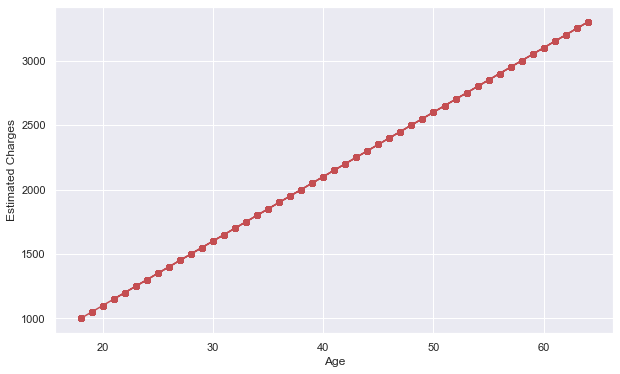

In [41]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

The suggested values lie on a line

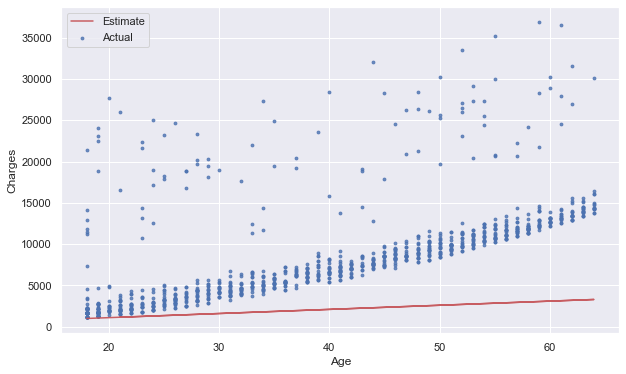

In [42]:
# Define the target as "charges" in "non_smoker_df": the actual data that we want to predict
target = non_smoker_df.charges

# plot a red line by "ages" against "estimated_charges "
plt.plot(ages, estimated_charges , 'r', alpha=0.9);

# the scatter plot with actual "ages" against actual "target"
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

The estimation line does not fit the actual data. The intercept is relatively match but the slope of line is low.

In [43]:
# define "try_parameters" function which takes w and b as inputs and creates the same plot.
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

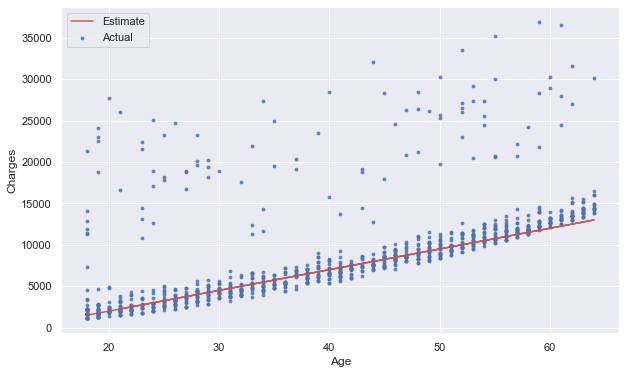

In [44]:
try_parameters(250, -2990)

## Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values. (predictions - targets)^2 / N
Calculate the average of the elements in the resulting matrix.
Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). 

Error = different between targets and predictions

In [45]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [46]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [47]:
!pip install numpy --quiet

In [48]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [49]:
w = 50
b = 100

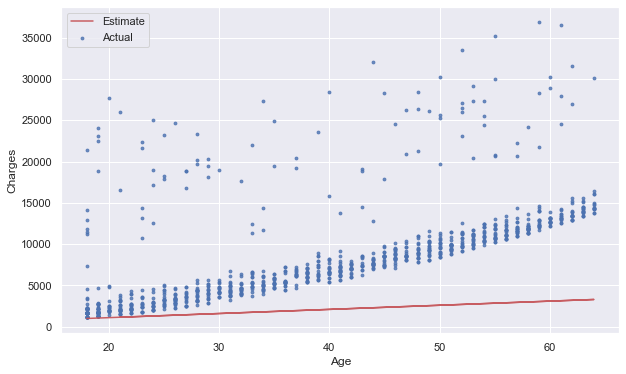

In [50]:
try_parameters(w, b)

The red line is estimated the age that is far from the actual, specially for oldage people.

In [51]:
#Target is how much is the premium (charges)
targets = non_smoker_df['charges']
# The prediction is the changable ages based on w and b
predicted = estimate_charges(non_smoker_df.age, w, b)

In [52]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [53]:
rmse(targets, predicted)

8461.949562575488

On average, each element in the prediction differs from the actual target by $8461(root mean squared error (RMSE)).

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model. The higher the loss, the more noisy and useless model becomes.

Let's modify the try_parameters functions to also display the loss.

In [54]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


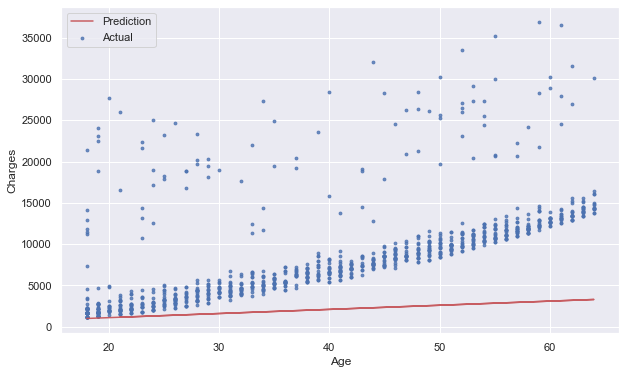

In [55]:
try_parameters(50, 100)

RMSE Loss:  4669.651885507871


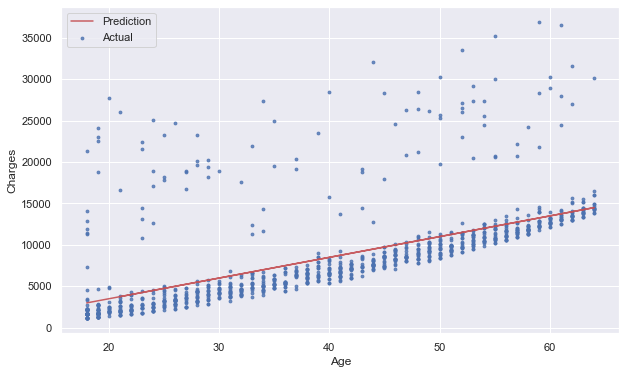

In [56]:
try_parameters(250, -1500)

The loss is ~$4669 is much lesser than before

# Linear regression model

use a library scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# create new object by LinearRegression()
reg = LinearRegression()

In [59]:
# define inputs and targets
inputs = non_smoker_df[['age']] # 2square brackets because of inputs (X) need 2 dimension array.
targets = non_smoker_df.charges # no matter target (y) has 1 dimension

In [60]:
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)
type(inputs)

inputs.shape : (1064, 1)
targes.shape : (1064,)


pandas.core.frame.DataFrame

Type of "inputs" is dataframe and has 2 dimensions. Type of targets is series and has 1 dimension

In [61]:
# Every model in scikit-learn has fit model. Fit method takes some parameters (X) and targets (y) and then fit the 
#line in leniar regression.
reg.fit(inputs, targets)

LinearRegression()

In [62]:
# prediction for all inputs (ages)
predictions = reg.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [63]:
#compare with targets
targets.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [64]:
# calculate RMSE different between targets and predictions
rmse(targets, predictions)

4662.505766636391

Due to the number of outliers the error is not too far of the fact.

In [65]:
#In scikit-learn, w is stored in coefficient which is the weight applied to each individual (age)
reg.coef_

array([267.24891283])

In [66]:
#Intercept contains b (bios)
reg.intercept_

-2091.4205565650827

It seems if I pick "w = 267.24" and "b = -2091.42" I have good line

RMSE Loss:  4662.505766636391


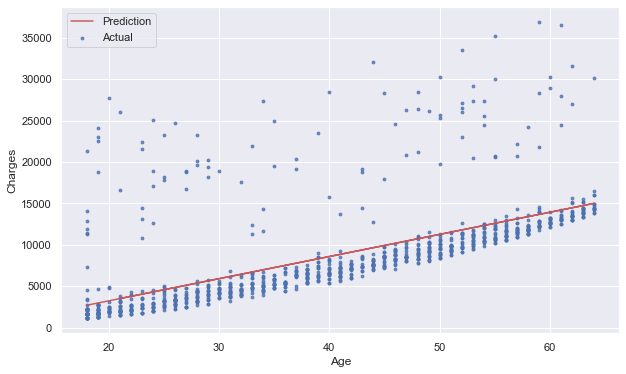

In [67]:
try_parameters(reg.coef_, reg.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

In [68]:
# Create inputs and targets. Note the imputs needs 2 dimention array "[['age']]" and targets just one dimension "['charges']"
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636391


# Linear Regression using Multiple Features

In [69]:
# add "bmi" feature 
non_smoker_df[['age', 'bmi']].head()

age     bmi
1   18  33.770
2   28  33.000
3   33  22.705
4   32  28.880
5   31  25.740

In [70]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

The relation ship of "charges" and "bmi" is too weak.

In [71]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461298


Due to the weakness of relationship of "charges" and "bmi", adding the "bmi" doesn't change the result of loss function. Also with 3 variables, it will be a plain in 3 dimension. 

In [72]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

There is no line between variables. It makes a plain and I show on 3d scatter plot. There is not relationship between "charges" and "bmi"

In [73]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [74]:
# check the parameters of the model.
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

 266.87657817 : age parameter; 7.07547666 : bmi parameter; -2293.6320906488672 : model intercept parameter 
 
 The lower bmi weight may show there is not relationship between bmi and charges as the 2d scatter plot showed before.

In [75]:
# add children and check the relationship with charges
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542186

The correlation is lower than age but higher than bmi

In [76]:
# use strip or violin plot 
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

lower part of values show increasing trend or positive correlation

In [77]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


again, number of children do not effect on the loss function.

In [78]:
# use the insur_data as a entire dataset (add the smokers to dataset)
# Create inputs and targets
inputs, targets = insur_data[['age', 'bmi', 'children']], insur_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125969


The loss is very high due to add the "smokers" to dataset that make outliers

## Categorical Data

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [79]:
smoker_codes = {'no': 0, 'yes': 1}
insur_data['smoker_code'] = insur_data.smoker.map(smoker_codes)

In [80]:
insur_data.charges.corr(insur_data.smoker_code)

0.7872514304984785

In [81]:
insur_data.head()

age     sex     bmi  children smoker     region      charges  smoker_code
0   19  female  27.900         0    yes  southwest  16884.92400            1
1   18    male  33.770         1     no  southeast   1725.55230            0
2   28    male  33.000         3     no  southeast   4449.46200            0
3   33    male  22.705         0     no  northwest  21984.47061            0
4   32    male  28.880         0     no  northwest   3866.85520            0

In [82]:
# use the smoker_code column for linear regression.
# Create inputs and targets
inputs, targets = insur_data[['age', 'bmi', 'children', 'smoker_code']], insur_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188077


half of previous value (11355.31).

In [83]:
# add the "sex" categorical column by creating numerical "sex_codes" column
sex_codes = {'female': 0, 'male': 1}
insur_data['sex_code'] = insur_data.sex.map(sex_codes)

In [84]:
insur_data.head()

age     sex     bmi  children smoker     region      charges  smoker_code  \
0   19  female  27.900         0    yes  southwest  16884.92400            1   
1   18    male  33.770         1     no  southeast   1725.55230            0   
2   28    male  33.000         3     no  southeast   4449.46200            0   
3   33    male  22.705         0     no  northwest  21984.47061            0   
4   32    male  28.880         0     no  northwest   3866.85520            0   

   sex_code  
0         0  
1         1  
2         1  
3         1  
4         1

In [85]:
insur_data.charges.corr(insur_data.sex_code)

0.05729206220202527

In [86]:
# Create inputs and targets
inputs, targets = insur_data[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], insur_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754538


# One-hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

In [87]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(insur_data[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [88]:
one_hot = enc.transform(insur_data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [89]:
insur_data[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [90]:
insur_data.head()

age     sex     bmi  children smoker     region      charges  smoker_code  \
0   19  female  27.900         0    yes  southwest  16884.92400            1   
1   18    male  33.770         1     no  southeast   1725.55230            0   
2   28    male  33.000         3     no  southeast   4449.46200            0   
3   33    male  22.705         0     no  northwest  21984.47061            0   
4   32    male  28.880         0     no  northwest   3866.85520            0   

   sex_code  northeast  northwest  southeast  southwest  
0         0        0.0        0.0        0.0        1.0  
1         1        0.0        0.0        1.0        0.0  
2         1        0.0        0.0        1.0        0.0  
3         1        0.0        1.0        0.0        0.0  
4         1        0.0        1.0        0.0        0.0

In [91]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = insur_data[input_cols], insur_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


# OR Create dummy variables

In [92]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly

insur_data_dummies = pd.get_dummies(insur_data)

In [93]:
insur_data_dummies.head()

age     bmi  children      charges  smoker_code  sex_code  northeast  \
0   19  27.900         0  16884.92400            1         0        0.0   
1   18  33.770         1   1725.55230            0         1        0.0   
2   28  33.000         3   4449.46200            0         1        0.0   
3   33  22.705         0  21984.47061            0         1        0.0   
4   32  28.880         0   3866.85520            0         1        0.0   

   northwest  southeast  southwest  sex_female  sex_male  smoker_no  \
0        0.0        0.0        1.0           1         0          0   
1        0.0        1.0        0.0           0         1          1   
2        0.0        1.0        0.0           0         1          1   
3        1.0        0.0        0.0           0         1          1   
4        1.0        0.0        0.0           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

In [94]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_female','sex_male', 'smoker_no','smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
inputs, targets = insur_data_dummies[input_cols], insur_data_dummies['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174454


# Model Improvements

### Scaling

In [95]:
model.coef_

array([   256.85635254,    339.19345361,    475.50054515,     65.6571797 ,
          -65.6571797 , -11924.26727096,  11924.26727096,    587.00923503,
          234.0453356 ,   -448.01281436,   -373.04175627])

In [96]:
model.intercept_

-666.9377199366281

Because different columns have different ranges( BMI is limited between 15 to 40 and the "northeast" column only takes the values 0 and 1), we have two issues:

1- We can't compare the weights of different column to identify which features are important;

2- A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by using the StandardScaler class from scikit-learn. "StandardScaler class" Standardizes features by removing the mean and scaling to unit variance.

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
# apply StandardScaler for three numeric columns
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(insur_data[numeric_cols])

StandardScaler()

In [99]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [100]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [101]:
# By StandardScaler, Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the 
# training set. Mean and standard deviation are then stored to be used on later data using transform.
scaled_inputs = scaler.transform(insur_data[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [102]:
# add it to the categorical data
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = insur_data[cat_cols].values

In [103]:
# add categorical data to standardized numerics
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = insur_data.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174457


In [104]:
# compare weights
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

The highest weights are the most important: smoker_code, age and bmi

### Creating a Test Set

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [107]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# calculate loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5589.2294555722665


Let's compare this with the training loss.

In [108]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# calculate loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6093.309188299419


Training Loss is higher than model

In [109]:
# The target is 'log price'
target = insur_data_dummies['charges']

# The inputs are everything BUT the dependent variable, so we can simply drop it
input = insur_data_dummies.drop(['charges'],axis=1)
input

age     bmi  children  smoker_code  sex_code  northeast  northwest  \
0      19  27.900         0            1         0        0.0        0.0   
1      18  33.770         1            0         1        0.0        0.0   
2      28  33.000         3            0         1        0.0        0.0   
3      33  22.705         0            0         1        0.0        1.0   
4      32  28.880         0            0         1        0.0        1.0   
...   ...     ...       ...          ...       ...        ...        ...   
1333   50  30.970         3            0         1        0.0        1.0   
1334   18  31.920         0            0         0        1.0        0.0   
1335   18  36.850         0            0         0        0.0        0.0   
1336   21  25.800         0            0         0        0.0        0.0   
1337   61  29.070         0            1         0        0.0        1.0   

      southeast  southwest  sex_female  sex_male  smoker_no  smoker_yes  \
0           0.0        1.0           1         0          0           1   
1           1.0        0.0           0         1          1           0   
2           1.0        0.0           0         1          1           0   
3           0.0        0.0           0         1          1           0   
4           0.0        0.0           0         1          1           0   
...         ...        ...         ...       ...        ...         ...   
1333        0.0        0.0           0         1          1           0   
1334        0.0        0.0           1         0          1           0   
1335        1.0        0.0           1         0          1           0   
1336        0.0        1.0           1         0          1           0   
1337        0.0        0.0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    0                 0                 0                 1  
1                    0                 0                 1                 0  
2                    0                 0                 1                 0  
3                    0                 1                 0                 0  
4                    0                 1                 0                 0  
...                ...               ...               ...               ...  
1333                 0                 1                 0                 0  
1334                 1                 0                 0                 0  
1335                 0                 0                 1                 0  
1336                 0                 0                 0                 1  
1337                 0                 1                 0                 0  

[1338 rows x 17 columns]

In [110]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scale = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scale.fit(input)

StandardScaler()

In [111]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scale.transform(input)

### Train Test Split

In [112]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [113]:
x_train

array([[-1.08275831, -1.66396826, -0.90861367, ..., -0.56641788,
        -0.61132367, -0.56641788],
       [ 0.3412655 ,  1.45287686, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788],
       [-0.58434998,  0.33081261, -0.07876719, ...,  1.76548098,
        -0.61132367, -0.56641788],
       ...,
       [ 1.26688097, -0.42051111, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.7652893 ,  0.87051895, -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.36756307,  0.28405994, -0.07876719, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [114]:
x_test

array([[ 1.69408811, -1.47695756, -0.90861367, ..., -0.56641788,
        -0.61132367, -0.56641788],
       [-1.08275831,  0.22090281, -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.43876426, -1.00943079, -0.07876719, ...,  1.76548098,
        -0.61132367, -0.56641788],
       ...,
       [ 0.48366788, -1.14968882, -0.07876719, ...,  1.76548098,
        -0.61132367, -0.56641788],
       [-0.4419476 , -1.04223969, -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.65555117, -1.75747362,  1.58092576, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [115]:
y_train

989    14571.89080
155     6948.70080
440     4738.26820
531    14043.47670
616    11658.11505
          ...     
261    17085.26760
428     3167.45585
859    10965.44600
801    14313.84630
692     2362.22905
Name: charges, Length: 1070, dtype: float64

In [116]:
y_test

1236    14449.85440
1060     1981.58190
636      2709.11190
347      8334.45755
259     33750.29180
           ...     
1201     8733.22925
55      47496.49445
1030    21677.28345
406      4185.09790
1119     5693.43050
Name: charges, Length: 268, dtype: float64

### Create a Regression

In [117]:
# Create a linear regression object
regre = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
regre.fit(x_train,y_train)

LinearRegression()

In [118]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = regre.predict(x_train)

Text(0.5, 1.0, 'Residuals PDF')

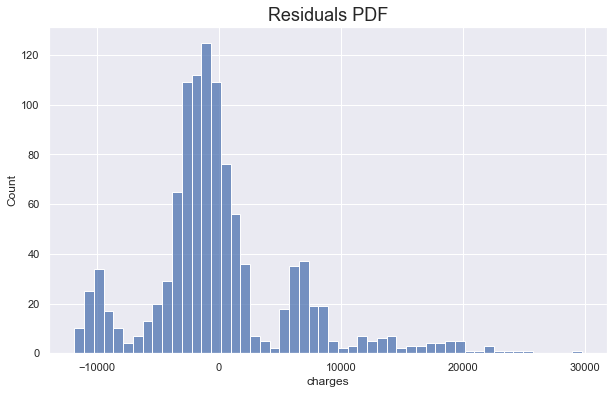

In [120]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In the best case scenario this plot should be normally distributed.
In our case we notice that there are many negative residuals (far away from the mean). Given the definition of the residuals (y_train - y_hat), negative values imply that y_hat (predictions) are much higher than y_train (the targets).
This is food for thought to improve our model

In [121]:
# Find the R-squared of the model
regre.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.7531546476117658

### Finding the weights and bias

In [122]:
# Obtain the bias (intercept) of the regression
reg.intercept_

-2091.4205565650827

In [123]:
# Obtain the weights (coefficients) of the regression
regre.coef_

array([ 3.54058328e+03,  1.95798062e+03,  5.93418136e+02,  2.21001322e+14,
        4.26109649e+14, -1.07770566e+16, -1.10155917e+16, -1.07376116e+16,
       -1.09087508e+16,  1.09937346e+15,  6.73263812e+14,  7.92570399e+14,
        5.71569078e+14, -1.10176032e+16, -1.08019099e+16, -1.19030327e+16,
       -1.09087508e+16])

In [124]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(input.columns.values, columns=['Features'])
reg_summary['Weights'] = regre.coef_
reg_summary
reg_summary.sort_values('Weights', ascending=False)

Features       Weights
9         sex_female  1.099373e+15
11         smoker_no  7.925704e+14
10          sex_male  6.732638e+14
12        smoker_yes  5.715691e+14
4           sex_code  4.261096e+14
3        smoker_code  2.210013e+14
0                age  3.540583e+03
1                bmi  1.957981e+03
2           children  5.934181e+02
7          southeast -1.073761e+16
5          northeast -1.077706e+16
14  region_northwest -1.080191e+16
8          southwest -1.090875e+16
16  region_southwest -1.090875e+16
6          northwest -1.101559e+16
13  region_northeast -1.101760e+16
15  region_southeast -1.190303e+16

## Testing

In [125]:
# Once we have trained and fine-tuned our model, we can proceed to test it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = regre.predict(x_test)
y_hat_test

array([11493.36583315,  3957.36583315,  1485.36583315, 11609.36583315,
       27645.36583315, 10005.36583315,   381.36583315,  7725.36583315,
        5453.36583315, 31597.36583315,  9557.36583315, 35789.36583315,
        2033.36583315, 11485.36583315, 11213.36583315, 12685.36583315,
        7777.36583315, 13453.36583315,  7797.36583315,   721.36583315,
       12341.36583315, 27453.36583315, 10133.36583315,  6689.36583315,
       33805.36583315,  3093.36583315,  4037.36583315, 27925.36583315,
       -1526.63416685, 10865.36583315, 12605.36583315, 37153.36583315,
        6873.36583315,  9261.36583315,  9873.36583315, 12685.36583315,
       26361.36583315,  7549.36583315, 17133.36583315, 10105.36583315,
       14673.36583315,  3565.36583315, 10489.36583315,   885.36583315,
        2109.36583315, 36405.36583315, 14285.36583315,  5453.36583315,
        4501.36583315,  5973.36583315,  5153.36583315, 12741.36583315,
       12541.36583315, 15409.36583315, 14621.36583315,  4545.36583315,
      